# 第五週: 中文文集的情緒分析2

本週課程為「情緒分析2」，與情緒分析1不同，這次會使用中研院提供的CKIP自然語言處理工具包，但其中不像coreNLP有提供情緒分析套件。   

所以在此介紹一款用於中文情緒分析的套件SnowNLP，是Corpus-base的情緒分析，不是使用情緒字典，而是使用預訓練的情緒分析模型或演算法，給與整個文章一個情緒分數。   

情緒分析2的步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「中文」的情緒分析，並且搭配python程式碼進行講解。在後面的內容中會介紹CKIP、分析方法、SnowNLP

## 大綱
1. 套件說明
2. CKIP 介紹
    + 2.1 安裝CKIP
    + 2.2 利用CKIP進行自然語言處理
3. CKIP 標註
    + 3.1 將抓取結果用CKIP進行處理
    + 3.2 探索分析 - NER
    + 3.3 探索分析 - POS
4. 利用SnowNLP進行情緒分析

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- CKIP: 全名為Chinese Knowledge and Information Processing，中研院開發的中文自然語言處理工具。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。
- SnowNLP: SnowNLP是一個可以方便的處理中文文本內容的python類庫，是受到了TextBlob的啟發而寫的。SnowNLP主要功能包括斷詞、詞性標註、情緒分析、漢字轉拼音、繁體轉簡體、關鍵詞提取以及文本摘要等等。

In [ ]:
# 安裝會使用到的套件
# 安裝ckiptagger前要先安裝tensorflow，有套件相依的問題
%pip install tensorflow==2.12.0
%pip install -U ckiptagger[tf,gdown]
%pip install wordcloud SnowNLP

In [2]:
# 確認當前工作目錄
# %pwd

In [1]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # Windows 中文字體

如果有重新裝package，記得需要restart kernel 才會使用更新後的套件

## 2. CKIP 介紹
- 是中研院詞庫小組開發的中文自然語言處理套件，其斷詞效果比起`jieba`效果更好，並且提供性命名實體辨識、詞性標註、句法分析
- github: https://github.com/ckiplab/ckiptagger

### 2.1 CKIP安裝

In [3]:
data_utils.download_data_gdown("./")  # 下載ckip model

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=bcb054de-fe6e-460b-8380-d272d77a3416
To: c:\Users\hank\Desktop\新增資料夾\data.zip
100%|██████████| 1.88G/1.88G [00:25<00:00, 72.4MB/s]


### 2.2 利用CKIP進行自然語言處理
透過ckip這個套件可以對文集進行斷詞、命名實體辨識、詞性標記等處理
+ CKIP 標註任務
    + 斷詞（ws）
        + 可以設定自己的辭典
            + `recommend_dictionary` 推薦字典
            + `coerce_dictionary` 強制字典
    + 實體辨識（ner）
    + 詞性標註（pos）
+ NER與POS名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [4]:
# 將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

c:\Users\hank\AppData\Local\Programs\Python\Python310\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\hank\AppData\Local\Programs\Python\Python310\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\hank\AppData\Local\Programs\Python\Python310\lib\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by th

In [5]:
# 自定義辭典
word_to_weight = {
    "魔法覺醒": 100,
    "睽違已久": 100,
}
dictionary1 = construct_dictionary(word_to_weight)
print(dictionary1)

[(4, {'魔法覺醒': 100.0, '睽違已久': 100.0})]


In [ ]:
sentence_list = [
    "哈利波特魔法覺醒是一個中國網易代理的粉絲睽違已久的手遊app",
    "很多人滿心期待這款英國出品的遊戲，卻又害怕受傷害"
]

word_sentence_list = ws(sentence_list)  # 斷詞，可以嘗試不放斷詞字典，看看結果會有什麼不同
pos_sentence_list = pos(word_sentence_list)
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
        print(f"{word}({pos})", end="\u3000")
    print()
    return
    
for i, sentence in enumerate(sentence_list):
    print()
    print("="*30)
    print(f"sentence {i}: {sentence}")
    print("\nPOS: ")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    print("\nNER: ")
    for entity in sorted(entity_sentence_list[i]):
        print(entity)
    


sentence 0: 哈利波特魔法覺醒是一個中國網易代理的粉絲睽違已久的手遊app

POS: 
哈利波特(Nb)　魔法覺醒(Nb)　是(SHI)　一(Neu)　個(Nf)　中國(Nc)　網易(Nb)　代理(VC)　的(DE)　粉絲(Na)　睽違已久(VH)　的(DE)　手遊(Na)　app(FW)　

NER: 
(11, 13, 'NORP', '中國')
(13, 15, 'ORG', '網易')

sentence 1: 很多人滿心期待這款英國出品的遊戲，卻又害怕受傷害

POS: 
很多(Neqa)　人(Na)　滿心(D)　期待(VK)　這(Nep)　款(Nf)　英國(Nc)　出品(VC)　的(DE)　遊戲(Na)　，(COMMACATEGORY)　卻(D)　又(D)　害怕(VK)　受(VJ)　傷害(Na)　

NER: 
(9, 11, 'GPE', '英國')


## 3. CKIP 標註

### 3.1 將抓取結果用CKIP進行處理
資料來源：
+ 工作流程平台蒐集PTT 美食版(Food)文章
+ 關鍵字:「吃到飽」(1630筆)
+ 時間: 2020-01-10 ~ 2022-12-31

我們已經介紹過CKIP的使用方式，現在來對PTT的資料使用CKIP進行自然語言處理

In [7]:
## 讀取文章
df = pd.read_csv('text.csv')
df.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/marriage/M.1610159827.A...,[求助]真的可以不給看手機嗎？,2021-01-09 10:37:05,safelove,marriage,常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""FlyOncidium""...",114.137.169.105,2021-01-10 01:20:56,ptt
1,2,https://www.ptt.cc/bbs/marriage/M.1610162736.A...,Re:老公工作不穩定,2021-01-09 11:25:34,mayko,marriage,"因為男方工作不穩定,房東才不肯租,只好換女生承租,對吧\n很殘忍的說...這無緣的孩子聰明,...",[],36.229.84.229,2021-01-10 01:20:56,ptt
2,3,https://www.ptt.cc/bbs/marriage/M.1610190309.A...,Re:[求助]真的可以不給看手機嗎？,2021-01-09 19:05:00,loser1,marriage,手機要看就給看啊！\n先帝爺不是說，\n一隻不夠，不能辦兩隻嗎？\n兩隻不夠，不能辦三隻嗎？...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""mark0204"", ""...",118.170.238.138,2021-01-10 01:20:56,ptt


定義文字清理的相關function

In [8]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    

    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n")))
    # print(len(paragraphs))
    # print(paragraphs)
    
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

CKIP 處理相關function

In [11]:
# 自定義辭典
with open('dict/user_dict.txt') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(2, {'拌飯': 500.0, '嚼勁': 500.0}), (3, {'重口味': 500.0, '炸物區': 500.0, '雞腿排': 500.0, '鴛鴦鍋': 500.0, '醬料區': 500.0, '新馬辣': 500.0, '肉次方': 500.0, '雪花牛': 500.0, '梅花豬': 500.0, '自助區': 500.0, '新北市': 500.0, '壽喜燒': 500.0, '握壽司': 500.0, '火鍋料': 500.0, '鮭魚卵': 500.0, '土瓶蒸': 500.0, '信義店': 500.0, '文山店': 500.0, '大安店': 500.0, '忠孝店': 500.0}), (4, {'饗食天堂': 500.0, '漢來海港': 500.0, '肋眼牛排': 500.0, '石頭火鍋': 500.0, '平日晚餐': 500.0, '韓式炸雞': 500.0, '梅花豬肉': 500.0, '日本料理': 500.0, '玉米濃湯': 500.0, '生菜沙拉': 500.0, '天使紅蝦': 500.0, '麻辣鴨血': 500.0, '火烤兩吃': 500.0, '剝皮辣椒': 500.0, '一蘭拉麵': 500.0})]


In [9]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos]) 
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level    
    # print(f"\ndocument {index}") 

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])            
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [10]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

[['常常看大家說，偷看手機是不對的，'], ['但如果已經結婚了，太太想看你手機，'], ['真的可以拒絕嗎'], ['感覺你拒絕，就是心裡有鬼，'], ['只是讓太太猜忌，自己日子難過']]
['常常看大家說，偷看手機是不對的，', '但如果已經結婚了，太太想看你手機，', '真的可以拒絕嗎', '感覺你拒絕，就是心裡有鬼，', '只是讓太太猜忌，自己日子難過']


In [14]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

time costing: 999.7761490345001


+ 欄位名稱介紹
    + pos_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + pos : part-of-speech,詞性
    + entity_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + ner: 命名實體
    + sentence_table 欄位:
        + system_id : ptt 貼文id
        + text: 原始斷句

In [15]:
pos_table.head() # word pos 列表

,system_id,word,pos
0,1,餐廳,Nc
1,1,名稱,Na
2,1,濃咖哩,Nb
3,1,消費,Na
4,1,時間,Na


In [18]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

total posts numbers: 1628
posts have NER: 1620


In [19]:
# 將文章存成csv
pos_table.to_csv('raw_data/zh/pos_table_buffet.csv', index = False)
entity_table.to_csv('raw_data/zh/entity_table_buffet.csv', index = False)
sentence_table.to_csv('raw_data/zh/sentence_table_buffet.csv', index = False)

### 3.2 探索分析 - NER

將剛才分析的資料匯入

In [11]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("pos_table_buffet.csv") 
entity_table = pd.read_csv("entity_table_buffet.csv") 
sentence_table = pd.read_csv("sentence_table_buffet.csv") 

### NER 種類分析
查看標註這個文集後辨識出哪一些實體種類<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [12]:
entity_table['ner'].unique()

array(['DATE', 'PERSON', 'CARDINAL', 'TIME', 'ORG', 'LOC', 'MONEY',
       'ORDINAL', 'GPE', 'FAC', 'NORP', 'WORK_OF_ART', 'EVENT',
       'LANGUAGE', 'PERCENT', 'LAW', 'PRODUCT', 'QUANTITY'], dtype=object)

In [13]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

,ner,count
1,DATE,4203
0,CARDINAL,3723
13,PERSON,1793
4,GPE,1632
16,TIME,1111
10,ORDINAL,688
11,ORG,318
9,NORP,251
8,MONEY,226
5,LANGUAGE,190


Text(0.5, 0, 'Frequency')

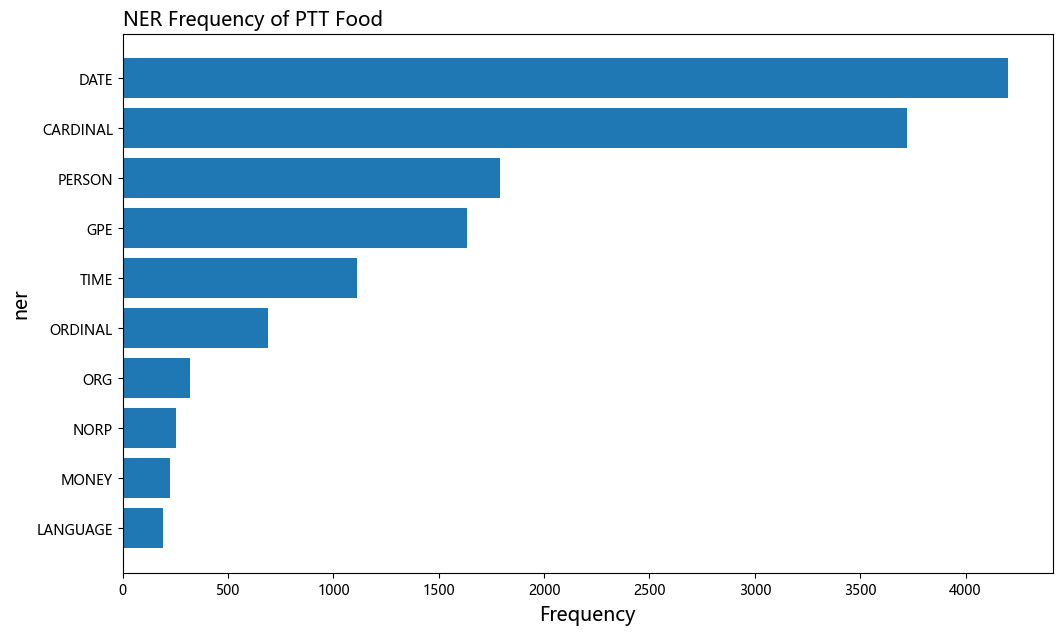

In [14]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of PTT Food',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
# fig.show()

### 涉及到的民族、宗教、政治團體(NORP)

Text(0.5, 0, 'Word Frequency')

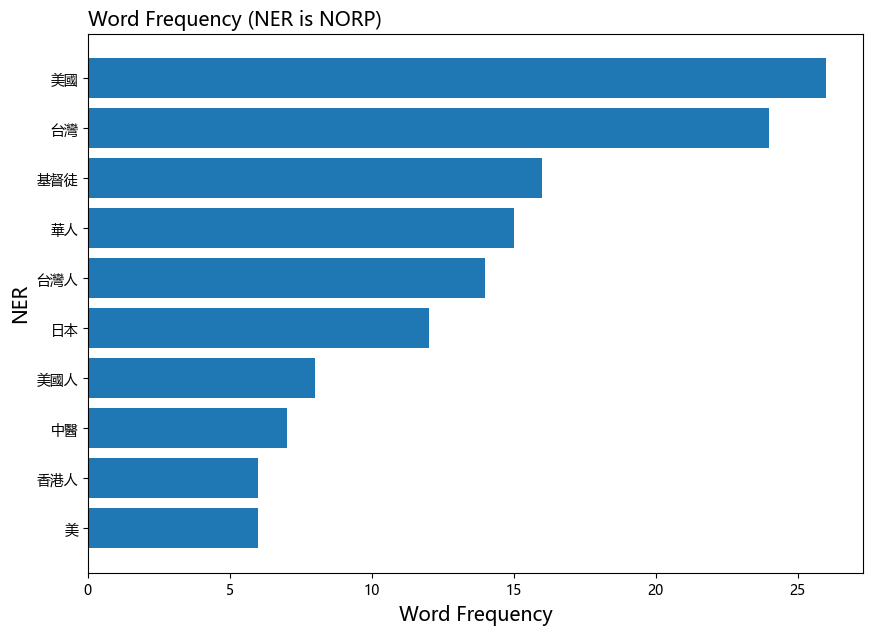

In [15]:
# 篩選ner為NORP的資料
l_noun = ["NORP"]
NORP = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = NORP.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is NORP)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

可以看到台灣人喜好的口味大多以「日式」、「韓式」料理為大宗

### 涉及到的組織(ORG)

Text(0.5, 0, 'Word Frequency')

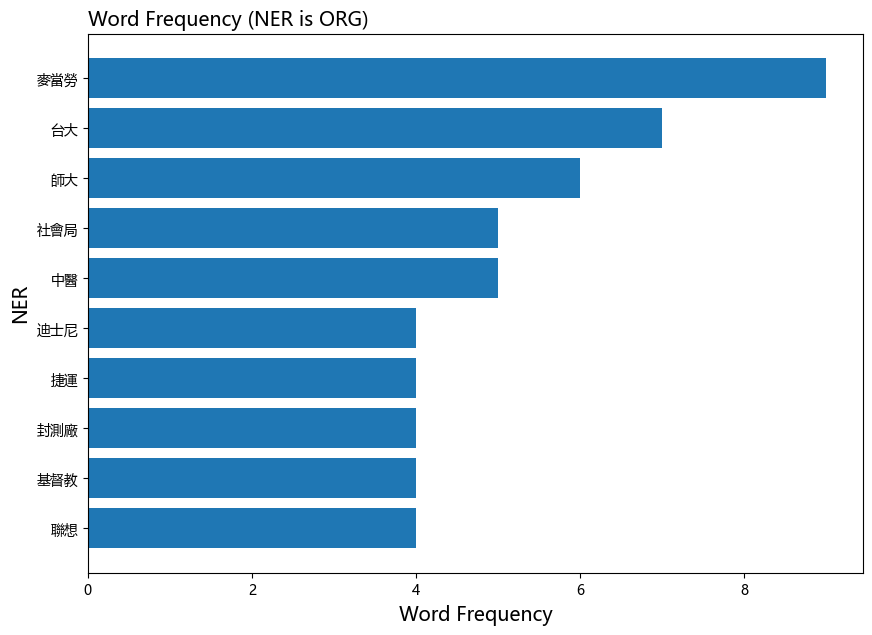

In [16]:
# 篩選ner為ORG的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

可以看到在多數的吃到飽食記之中，「哈根達斯」是多數食記會介紹到的一環，也間接反映出讀者對於吃到飽餐廳冰淇淋品牌的關注。

### 涉及到的人名(PERSON)

Text(0.5, 0, 'Word Frequency')

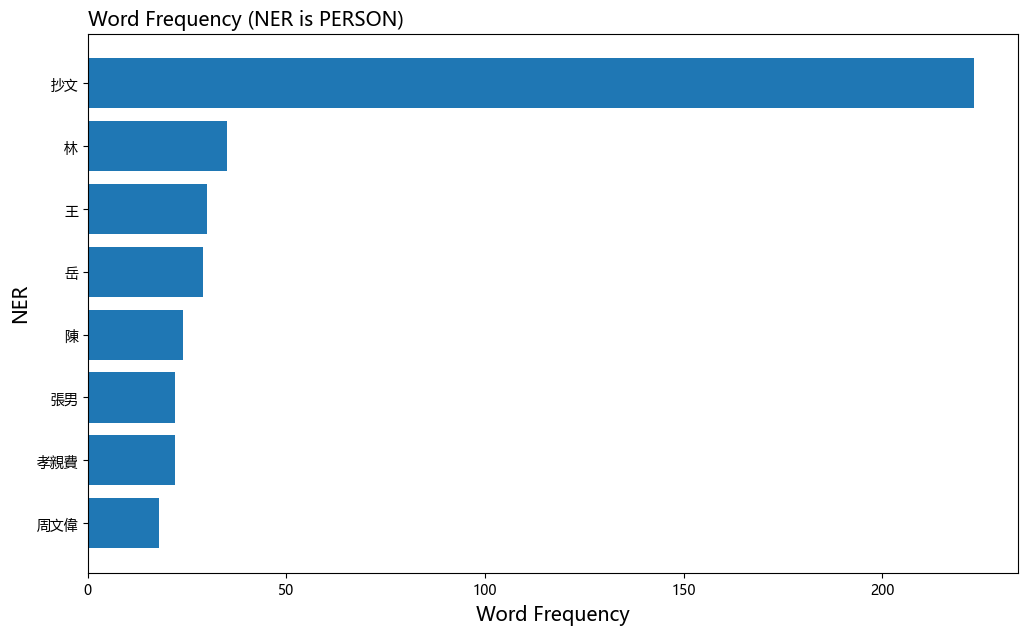

In [17]:
# 篩選ner為PERSON的資料
l_noun = ["PERSON"]
PERSON = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = PERSON.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()

# 設定中文字形
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
# fig.show()

下面找出「偷吃」相關文章，與後續情緒分析一起做探索

In [19]:
keyword_list = [
    "外遇", "偷吃", "出軌", "偷腥", "劈腿", "紅杏出牆", "婚外情",
    "情婦", "小三", "小四", "小五", "情夫", "老王", "小白臉",
    "渣男", "渣女", "綠茶婊", "備胎", 
    "信任破裂", "背叛",
    "妨害家庭", "通姦"
]
shu_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{shu_selected.shape[0]}篇相關貼文")
shu_selected.head(3)

外遇 偷吃 出軌 偷腥 劈腿 紅杏出牆 婚外情 情婦 小三 小四 小五 情夫 老王 小白臉 渣男 渣女 綠茶婊 備胎 信任破裂 背叛 妨害家庭 通姦：320篇相關貼文


,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/marriage/M.1610159827.A...,[求助]真的可以不給看手機嗎？,2021-01-09 10:37:05,safelove,marriage,常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""FlyOncidium""...",114.137.169.105,2021-01-10 01:20:56,ptt
6,7,https://www.ptt.cc/bbs/marriage/M.1610206202.A...,Re:[閒聊]離婚的掙扎,2021-01-09 23:30:01,aass5566,marriage,是不是陽明醫哥阿??\n\n 如果是的話 這個問題就好解決了\n如果是醫哥的話... 總之...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ahtnamas"", ""...",36.237.62.32,2021-01-10 01:20:58,ptt
19,20,https://www.ptt.cc/bbs/marriage/M.1610584018.A...,Re:[求助]老婆說去上班實際是跟其他人去唱歌。,2021-01-14 08:26:51,season2011,marriage,有的人給的建議還不如原po自己的處置\n\n外遇都除罪化了\n抓到了也就賠30萬\n蒐集證據...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""imreader"", ""...",114.46.1.133,2021-01-15 01:09:08,ptt


### 3.3 探索分析 - POS

#### POS 種類分析
查看辨識出哪幾種POS<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [20]:
pos_table['pos'].unique()

array(['D', 'VC', 'Nh', 'VE', 'COMMACATEGORY', 'Na', 'SHI', 'VH', 'T',
       'Cbb', 'VA', 'Di', 'VF', 'VK', 'Ng', 'V_2', 'VL', 'VJ', 'Nes',
       'Nf', 'P', 'DE', 'Dfa', 'Da', 'Nd', 'VG', 'VHC', 'Neqa', 'VD',
       'Nep', 'VCL', 'Nc', 'Caa', 'FW', 'Neu', 'Nb', 'Dk', 'Ncd', 'VB',
       'I', 'A', 'Nv', 'Cba', 'Dfb', 'VI', 'VAC', 'Cab', 'Neqb',
       'COLONCATEGORY', 'DM', 'PERIODCATEGORY', 'PARENTHESISCATEGORY',
       'ETCCATEGORY', 'DASHCATEGORY', 'PAUSECATEGORY'], dtype=object)

看看除了標點符號，大部分的POS都是哪一類

In [21]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

,pos,count
17,Na,157216
5,D,147948
29,Nh,88789
38,VC,63396
44,VH,54895
7,DE,43837
31,P,35730
41,VE,32068
35,VA,30420
4,Cbb,27322


#### POS 常見詞性列表
+ Na: 普通名詞
+ D: 副詞
+ VC: 動作及物動詞
+ Nb: 專有名詞
+ FW: 外文
+ VH: 狀態不及物動詞
+ Nh: 代名詞
+ DE: 的之得地
+ P: 介詞
+ VA: 動作不及物動詞
+ T: 語助詞
+ SHI: 是

C:\Users\hank\AppData\Local\Temp\ipykernel_12344\2478466374.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


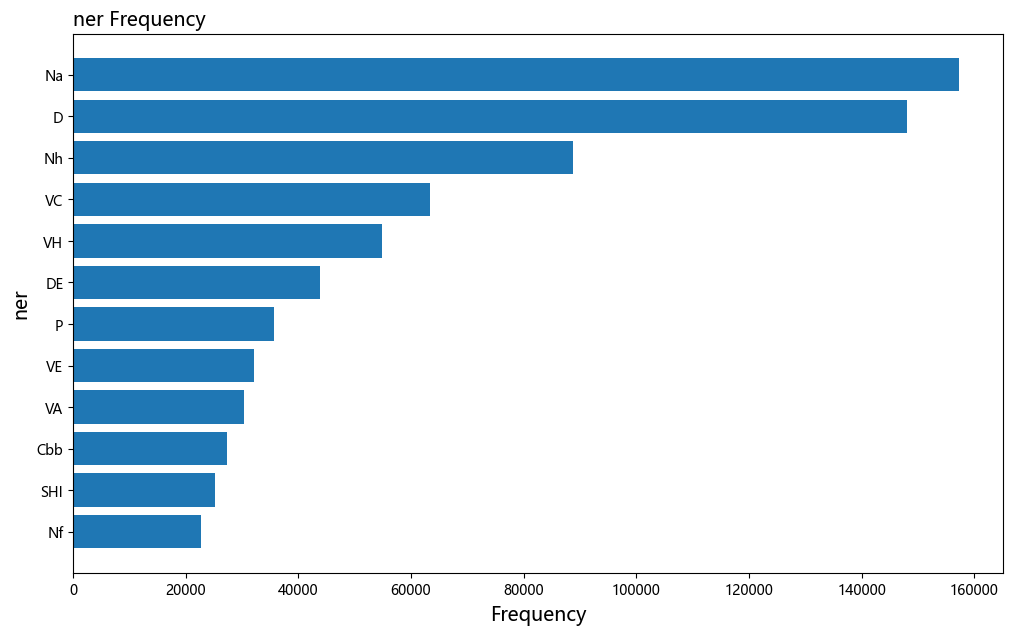

In [22]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('ner Frequency',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

### 涉及到的名詞(Noun)
+ 我們可以找出談論吃到飽時大部分討論到的名詞，探索大家的關注焦點。
+ 名詞可以分為「Na: 普通名詞」、「Nb: 專有名詞」等

In [24]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

,word,count
155,周,60
316,小王,43
485,林,36
542,毛,34
372,張男,28
272,孫,21
444,旦,21
363,張,20
160,周文偉,18
1087,黃嘉千,16


C:\Users\hank\AppData\Local\Temp\ipykernel_12344\488784228.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


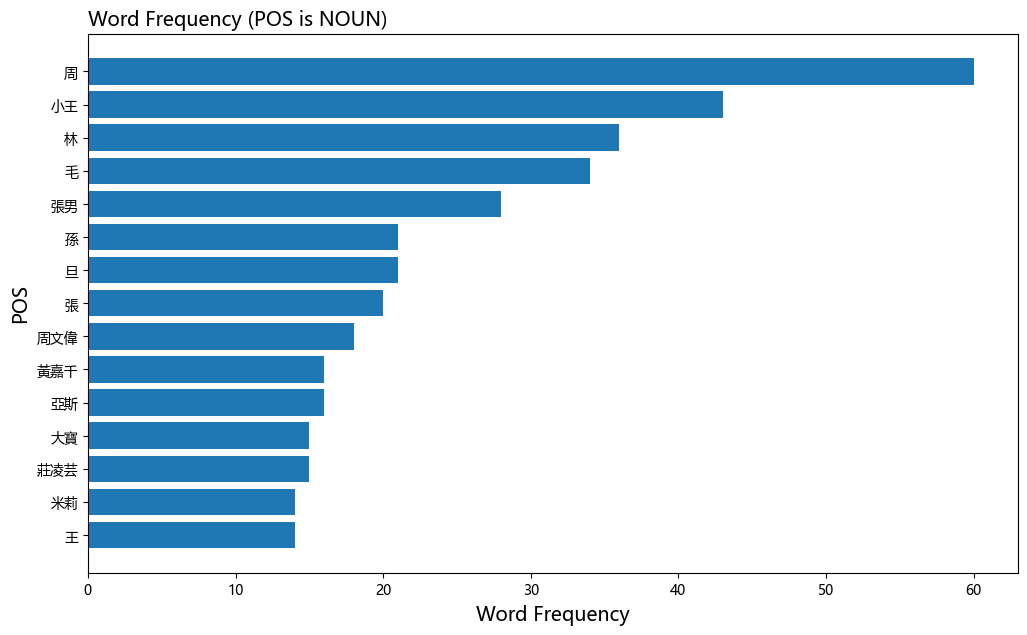

In [25]:
# 設定中文字形
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

可以看到哈根達斯依舊是出現最多次的專有名詞，另外，從「安格斯」、「菲力」和「松阪」等專有名詞可以推測出大家對於肉類也有較高的討論度。

### 涉及到的動詞(VERB)
+ 我們可以找出談論吃到飽時大部分討論到的動詞，探索相關行為。
+ VC: 動作及物動詞、VH: 狀態不及物動詞、VA: 動作不及物動詞

In [26]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

,word,count
2650,溝通,808
2724,照顧,784
1845,接受,673
2264,改變,580
3504,處理,572
3615,解決,552
1215,幫忙,522
4182,選擇,495
4146,遇到,388
83,付出,365


C:\Users\hank\AppData\Local\Temp\ipykernel_12344\29217454.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


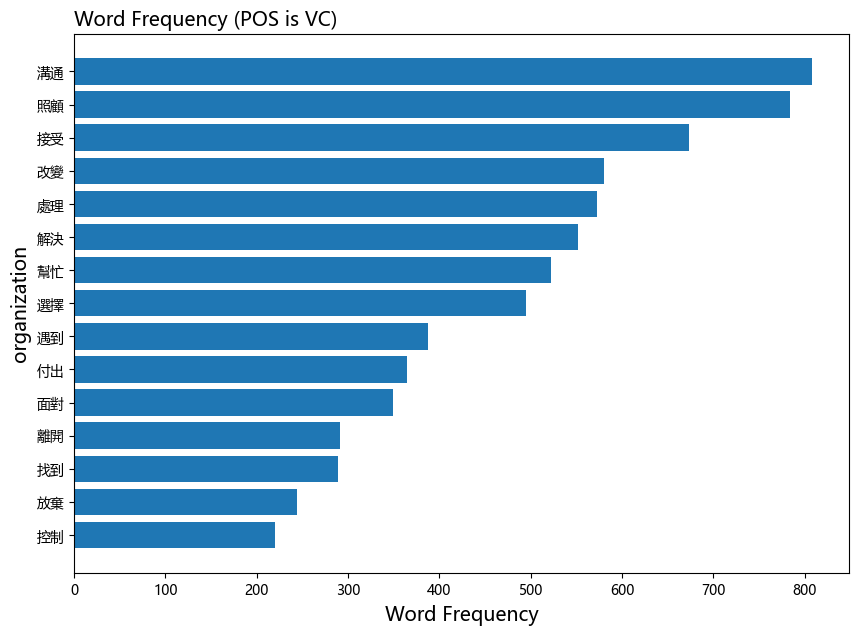

In [27]:
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is VC)',loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

## 4. 利用SnowNLP進行情緒分析

+ SnowNLP 針對中文設計，可以提取句子的情緒分類
+ 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
+ 情緒值在 0~1之間，代表負面到正面
+ 官方github: https://github.com/isnowfy/snownlp

In [28]:
from snownlp import SnowNLP
s = SnowNLP('這部電影很讚')
s.sentiments # 範圍在 0~ 1之間 (負面~正面)

0.786074481210413

使用先前NER得到的「偷吃」相關文章，看看相關文章的情緒表現。<br>

In [29]:
sentence_table =  pd.read_csv('text.csv')

sentiment_date = pd.merge(sentence_table,shu_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

,system_id,artUrl,artTitle,artDate_x,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource_x,artDate_y,dataSource_y
0,1,https://www.ptt.cc/bbs/marriage/M.1610159827.A...,[求助]真的可以不給看手機嗎？,2021-01-09 10:37:05,safelove,marriage,常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""FlyOncidium""...",114.137.169.105,2021-01-10 01:20:56,ptt,2021-01-09 10:37:05,ptt
6,7,https://www.ptt.cc/bbs/marriage/M.1610206202.A...,Re:[閒聊]離婚的掙扎,2021-01-09 23:30:01,aass5566,marriage,是不是陽明醫哥阿??\n\n 如果是的話 這個問題就好解決了\n如果是醫哥的話... 總之...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ahtnamas"", ""...",36.237.62.32,2021-01-10 01:20:58,ptt,2021-01-09 23:30:01,ptt
19,20,https://www.ptt.cc/bbs/marriage/M.1610584018.A...,Re:[求助]老婆說去上班實際是跟其他人去唱歌。,2021-01-14 08:26:51,season2011,marriage,有的人給的建議還不如原po自己的處置\n\n外遇都除罪化了\n抓到了也就賠30萬\n蒐集證據...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""imreader"", ""...",114.46.1.133,2021-01-15 01:09:08,ptt,2021-01-14 08:26:51,ptt


In [31]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['artContent'],), axis = 1)
sentiment_date.head(3)

,system_id,artUrl,artTitle,artDate_x,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource_x,artDate_y,dataSource_y,sentimentValue
0,1,https://www.ptt.cc/bbs/marriage/M.1610159827.A...,[求助]真的可以不給看手機嗎？,2021-01-09 10:37:05,safelove,marriage,常常看大家說，偷看手機是不對的，\n但如果已經結婚了，太太想看你手機，\n真的可以拒絕嗎？\...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""FlyOncidium""...",114.137.169.105,2021-01-10 01:20:56,ptt,2021-01-09 10:37:05,ptt,3.113065e-13
6,7,https://www.ptt.cc/bbs/marriage/M.1610206202.A...,Re:[閒聊]離婚的掙扎,2021-01-09 23:30:01,aass5566,marriage,是不是陽明醫哥阿??\n\n 如果是的話 這個問題就好解決了\n如果是醫哥的話... 總之...,"[{""cmtStatus"": ""噓"", ""cmtPoster"": ""ahtnamas"", ""...",36.237.62.32,2021-01-10 01:20:58,ptt,2021-01-09 23:30:01,ptt,2.238210e-13
19,20,https://www.ptt.cc/bbs/marriage/M.1610584018.A...,Re:[求助]老婆說去上班實際是跟其他人去唱歌。,2021-01-14 08:26:51,season2011,marriage,有的人給的建議還不如原po自己的處置\n\n外遇都除罪化了\n抓到了也就賠30萬\n蒐集證據...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""imreader"", ""...",114.46.1.133,2021-01-15 01:09:08,ptt,2021-01-14 08:26:51,ptt,2.274737e-06


In [32]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    3.080000e+02
mean     8.029415e-02
std      2.612223e-01
min      0.000000e+00
25%      0.000000e+00
50%      2.220446e-16
75%      7.357615e-08
max      1.000000e+00
Name: sentimentValue, dtype: float64

<Axes: >

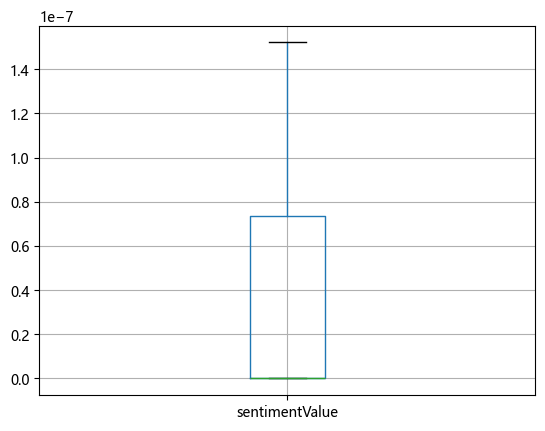

In [33]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

從上圖中發現大部分天數的情緒值都在0.6~0之間，偏向負面，推測是因為對象偷吃真的很難過

In [44]:
# 篩選掉只有單個字元的結果
filter_sentiment = sentiment_date.loc[sentiment_date['sentimentValue'] > 0.7]
filter_sentiment.head()
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

### 正面詞彙文字雲

In [45]:
# 自定停用字
with open('stopwords.txt',encoding='utf-8') as f:
    stop_words = f.read().splitlines()

print(stop_words[:20])

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一']


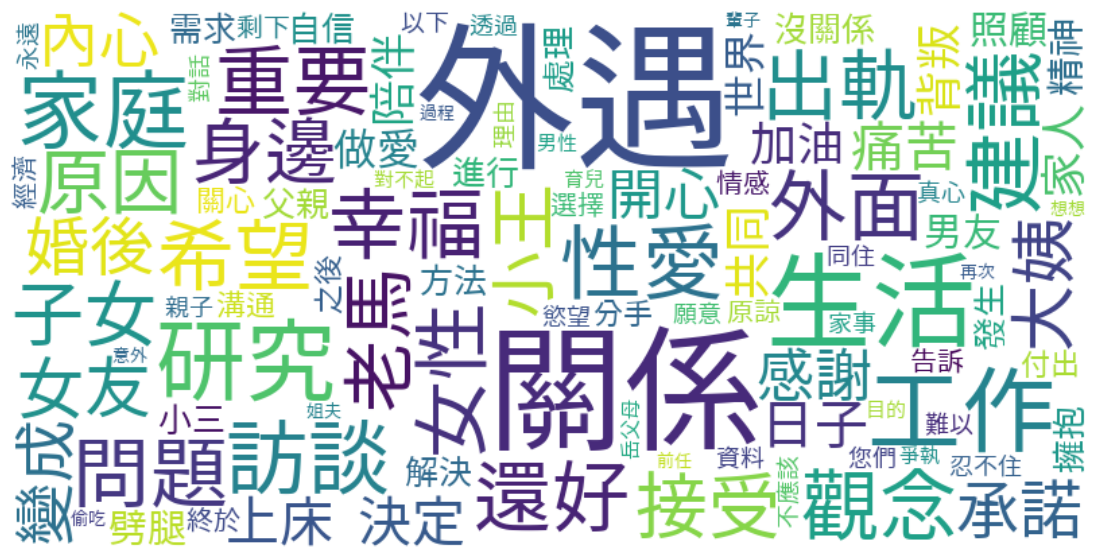

In [46]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(('時間','營業','餐廳','覺得','真的','台灣','台北','高雄','有點','完全','飯店','會館','旭集','訂位','最多','相當','不錯','部分','最多','提供'))
stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

### 中性詞彙文字雲

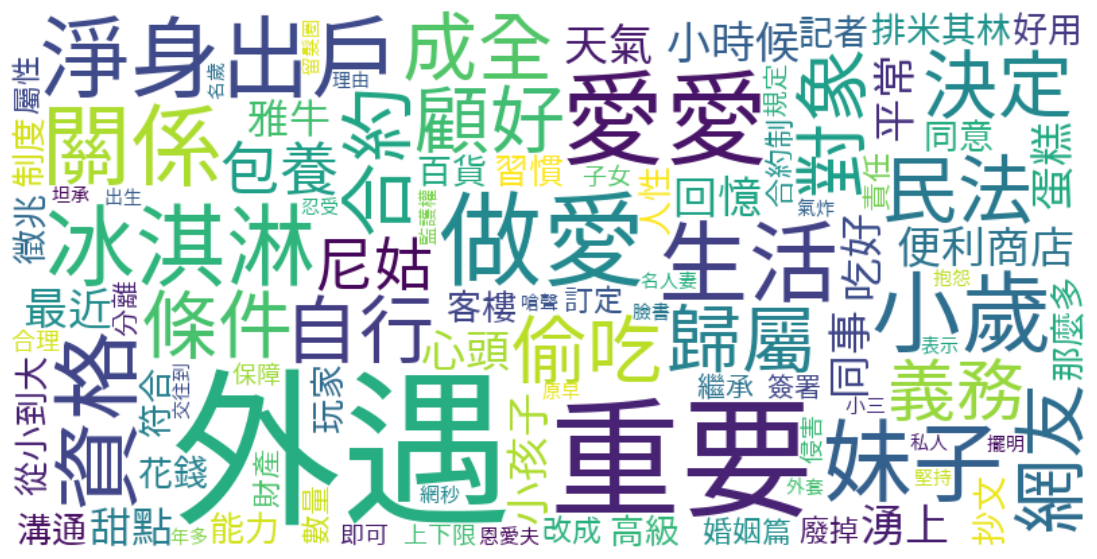

In [47]:

filter_sentiment = sentiment_date[(sentiment_date['sentimentValue'] > 0.4) & (sentiment_date['sentimentValue'] < 0.7)]
filter_sentiment.head()
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

### 負面情緒文字雲

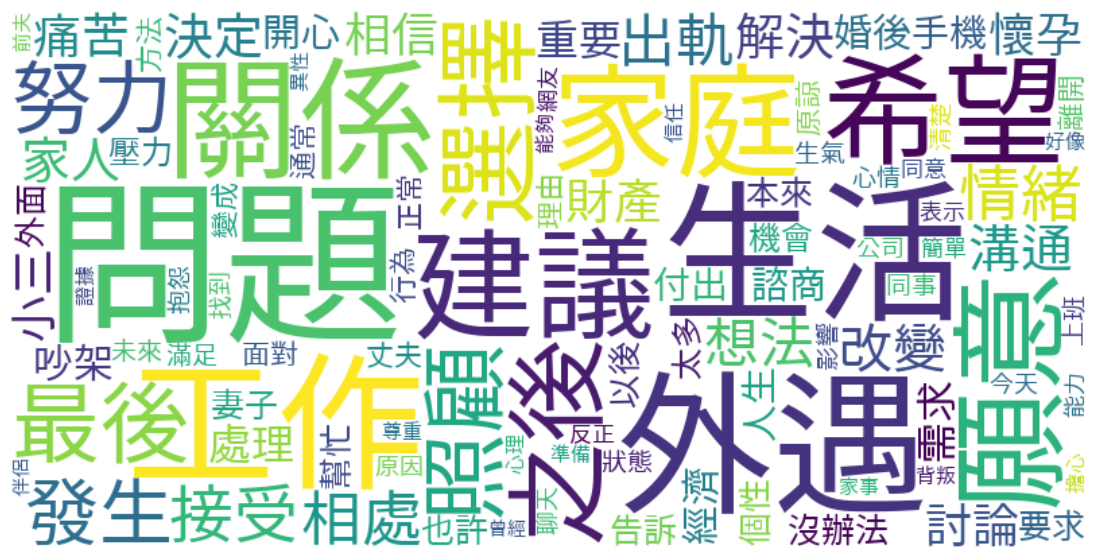

In [48]:

filter_sentiment = sentiment_date[(sentiment_date['sentimentValue'] < 0.4) ]
filter_sentiment.head()
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=100, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()